<a href="https://colab.research.google.com/github/alvaro-morais-png/kube-news/blob/main/%C3%81rea%20Urbanizada%20no%20tempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
bioma = pd.read_csv('/MapBiomas_Maceio.csv')
dado = bioma.loc[[0, 12, 19]]#separei os índices 0, 12 e 30

In [ ]:
#Transpor o DataFrame /invertendo a tabela pro tamanho vertical
dado_coluna = dado.T
dado_coluna['Ano'] = dado_coluna.index
#dado_coluna = dado_coluna.set_index('Índice')
dado_coluna.columns = ['Floresta', 'Agropecuária', 'Urbanizada','Ano'] #renomeando os atributos das colunas
dado_coluna = dado_coluna.drop(index = 'Classe') #deletando a linha com o índece Classe
df_bioma = pd.DataFrame(dado_coluna)
new_order = ['Ano','Floresta', 'Agropecuária', 'Urbanizada']
df_bioma = df_bioma.reindex(columns=new_order)
# Adicionando um índice sequencial
#df_bioma['Índice'] = range(1, len(df_bioma) + 1)
#df_bioma = df_bioma.set_index('Índice')

df_bioma.head()

,Ano,Floresta,Agropecuária,Urbanizada
1985,1985,11491.162528,31992.41109,4460.436313
1986,1986,11291.215075,29908.863169,6954.594059
1987,1987,10573.094645,30363.498841,7240.749766
1988,1988,9715.802066,31021.862959,7441.180951
1989,1989,9447.668263,31028.702677,7691.893993


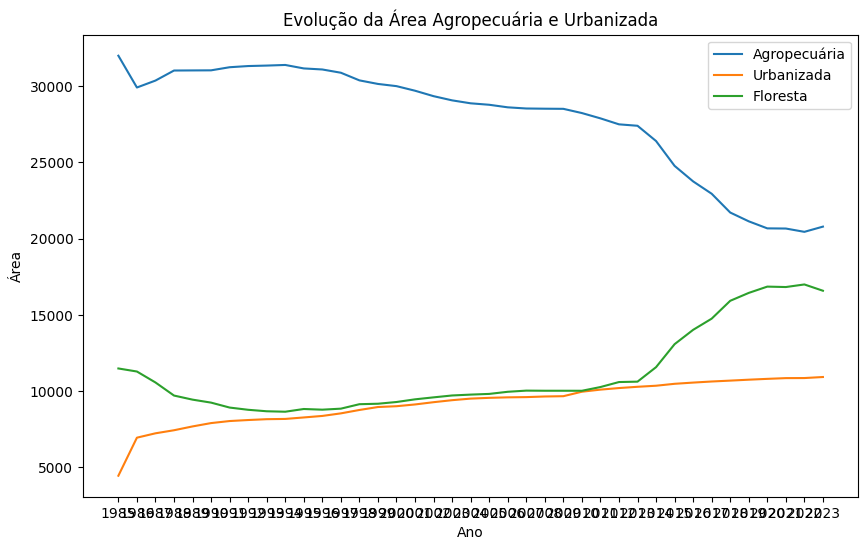

In [ ]:
# Plotando os dados no mesmo gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_bioma['Ano'], df_bioma['Agropecuária'], label='Agropecuária')
plt.plot(df_bioma['Ano'], df_bioma['Urbanizada'], label='Urbanizada')
plt.plot(df_bioma['Ano'], df_bioma['Floresta'], label='Floresta')

# Personalizando o gráfico
plt.xlabel('Ano', )
plt.ylabel('Área')
plt.title('Evolução da Área Agropecuária e Urbanizada')
plt.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
# Convertendo a coluna 'Ano' para o formato datetime
df_bioma['Ano'] = pd.to_datetime(df_bioma['Ano'])
# Convertendo a coluna 'idade' para o tipo inteiro
df_bioma['Floresta'] =df_bioma['Floresta'].astype(float)
df_bioma['Agropecuária'] =df_bioma['Agropecuária'].astype(float)
df_bioma['Urbanizada'] =df_bioma['Urbanizada'].astype(float)
df_bioma.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 1985 to 2023
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ano           39 non-null     datetime64[ns]
 1   Floresta      39 non-null     float64       
 2   Agropecuária  39 non-null     float64       
 3   Urbanizada    39 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.6+ KB


In [ ]:
dfurb = df_bioma.drop(['Floresta','Agropecuária'], axis=1)
dfurb = dfurb.rename(columns={'Ano':'ds', 'Urbanizada':'y'}) #ajustei os nomes das colundas

dfurb.reset_index(inplace=True)#criei um novo index iniciando de 0
dfurb = dfurb.drop(['index'], axis=1)#deletei uma coluna com o nome index que surgiu
dfurb.head()

,ds,y
0,1985-01-01,4460.436313
1,1986-01-01,6954.594059
2,1987-01-01,7240.749766
3,1988-01-01,7441.180951
4,1989-01-01,7691.893993


In [ ]:
train_set = dfurb.iloc[:-10]
test_set = dfurb.iloc[-10:]

In [ ]:
model_anual = Prophet()

In [ ]:
model_anual.fit(train_set)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkrkctqir/s26iqx9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkrkctqir/cyj0so61.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51304', 'data', 'file=/tmp/tmpkrkctqir/s26iqx9y.json', 'init=/tmp/tmpkrkctqir/cyj0so61.json', 'output', 'file=/tmp/tmpkrkctqir/prophet_model75mcifwv/prophet_model-20250117154726.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
y_pred = model_anual.predict(test_set)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

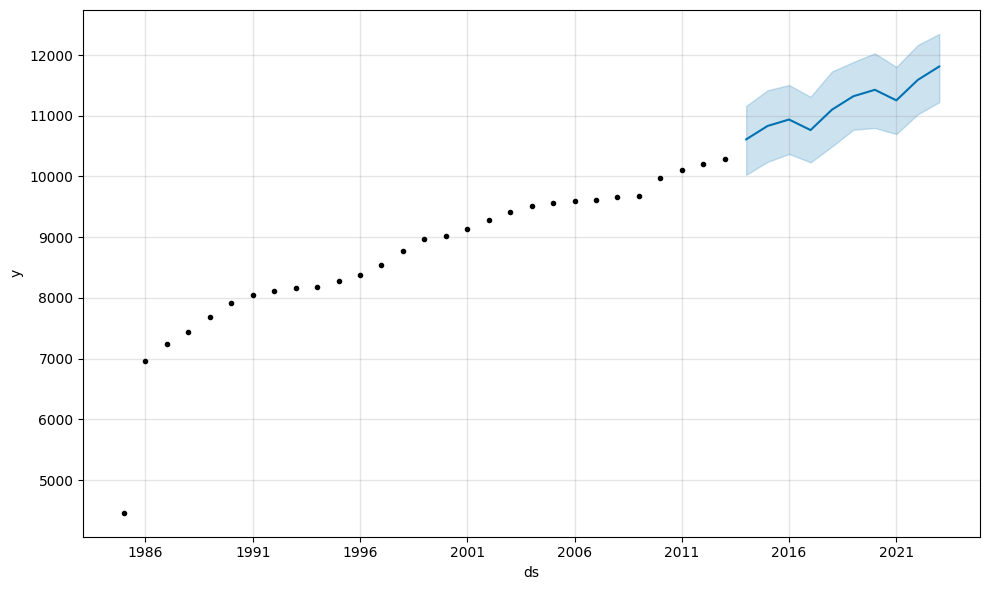

In [ ]:
model_anual.plot(y_pred);#o ; deixa retornar apenas um gráfico

# Nova secção

<Axes: xlabel='ds'>

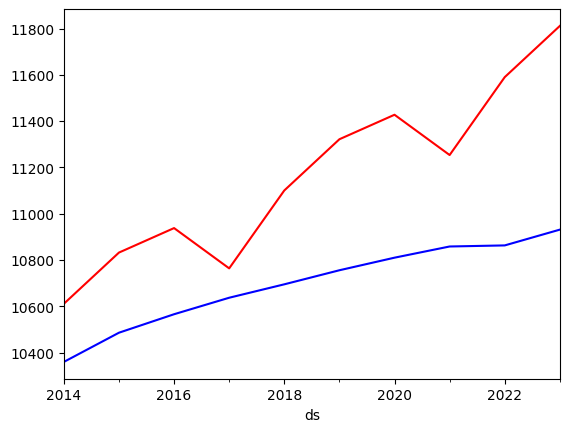

In [ ]:
y_pred.set_index('ds')['yhat'].plot(color='red')
test_set.set_index('ds')['y'].plot(color='blue')

In [ ]:
print('MAE:{}'.format(metrics.mean_absolute_error(test_set['y'].values, y_pred['yhat'].values)))
print('RMSE:{}'.format( metrics.mean_squared_error(test_set['y'].values, y_pred['yhat'].values)))

MAE:468.7101944134853
RMSE:266221.75114565715


In [ ]:
X = df_bioma['Floresta']
y = df_bioma['Agropecuária']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_bioma['Floresta'], df_bioma['Agropecuária'], random_state=0)
print("\nBase de treinamento ({0}):\n{1}\n".format("X_train.shape", X_train.shape))
print("\nBase de teste ({0}):\n{1}\n".format("X_test.shape", X_test.shape))


Base de treinamento (X_train.shape):
(29,)


Base de teste (X_test.shape):
(10,)

